###FinancialInstrument Class live

In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yfinance
plt.style.use("seaborn")

In [144]:
df = pd.read_csv("eurusd_d.csv",parse_dates=["Date"],index_col="Date",usecols = ["Open","Date"])

In [145]:
df

,Open
Date,
2004-01-05,1.26080
2004-01-06,1.26730
2004-01-07,1.27260
2004-01-08,1.26290
2004-01-09,1.27710
...,...
2024-02-09,1.07772
2024-02-12,1.07853
2024-02-13,1.07725


In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5217 entries, 2004-01-05 to 2024-02-15
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    5217 non-null   float64
dtypes: float64(1)
memory usage: 81.5 KB


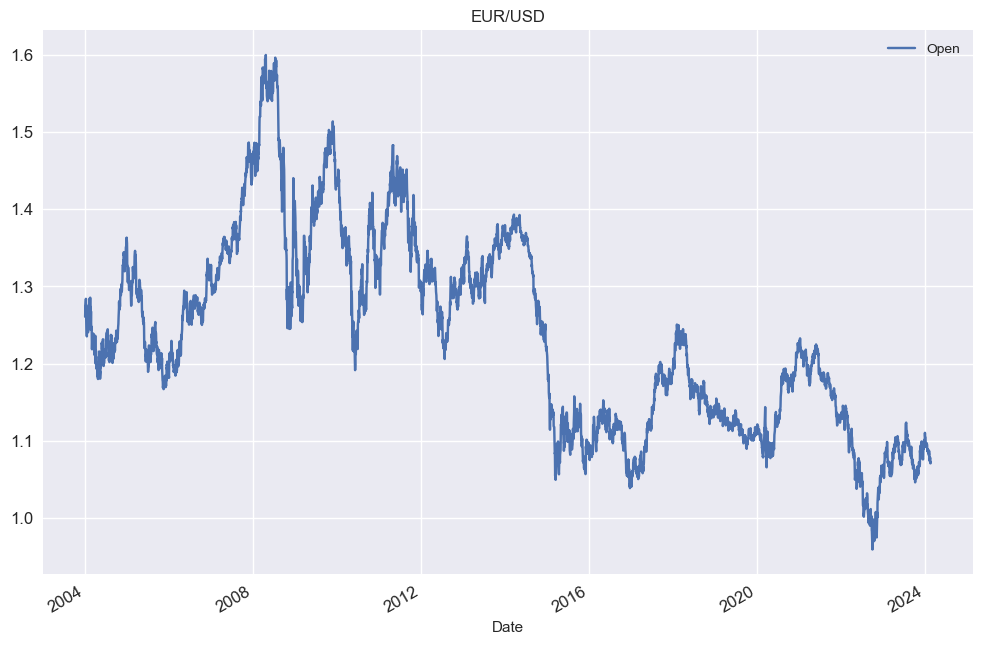

In [147]:
df.plot(figsize = (12,8), title = "EUR/USD",fontsize = 12)
plt.show()

### 计算每个时刻的对数收益率

In [148]:
 df["returns"] = np.log(df.div(df.shift(1)))

In [149]:
df

,Open,returns
Date,,
2004-01-05,1.26080,NaN
2004-01-06,1.26730,0.005142
2004-01-07,1.27260,0.004173
2004-01-08,1.26290,-0.007651
2004-01-09,1.27710,0.011181
...,...,...
2024-02-09,1.07772,0.000483
2024-02-12,1.07853,0.000751
2024-02-13,1.07725,-0.001188


#### A simple Buy and Hold "Strategy"

In [150]:
df.dropna(inplace=True)

In [151]:
df

,Open,returns
Date,,
2004-01-06,1.26730,0.005142
2004-01-07,1.27260,0.004173
2004-01-08,1.26290,-0.007651
2004-01-09,1.27710,0.011181
2004-01-12,1.28400,0.005388
...,...,...
2024-02-09,1.07772,0.000483
2024-02-12,1.07853,0.000751
2024-02-13,1.07725,-0.001188


##### 每日收益直方图

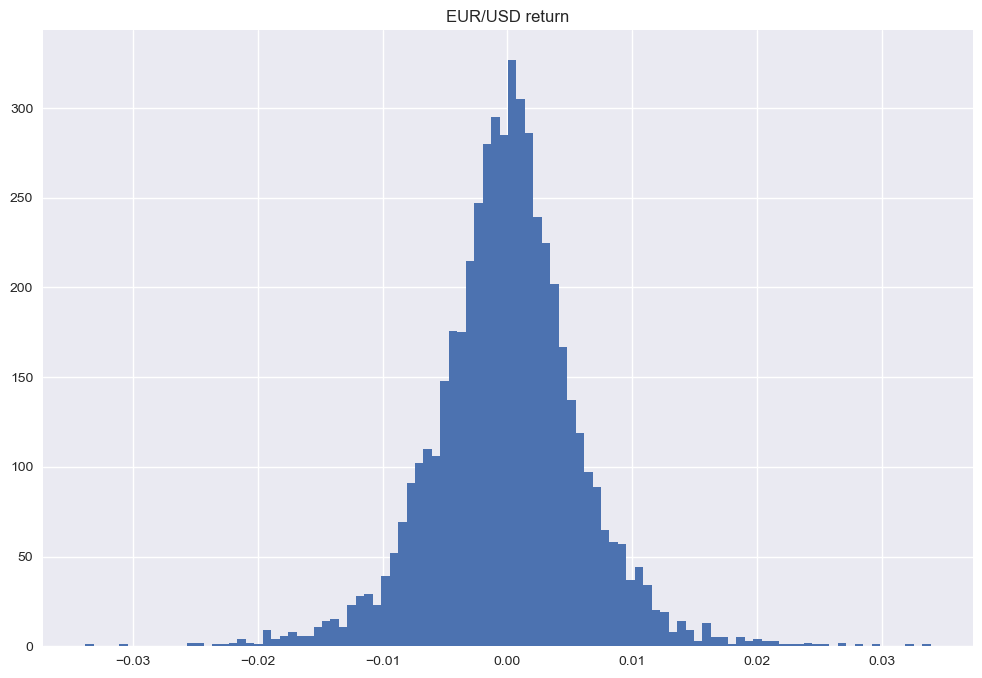

In [153]:
df.returns.hist(bins=100,figsize=(12,8))
plt.title("EUR/USD return")
plt.show()               

In [154]:
df.returns.sum()

-0.16145574450604327

In [155]:
np.exp(df.returns.sum())

0.8509041878172587

In [156]:
df.Open[-1] / df.Open[0]

0.8465398879507615

In [158]:
df.returns.cumsum().apply(np.exp)

Date
2004-01-06    1.005155
2004-01-07    1.009359
2004-01-08    1.001666
2004-01-09    1.012928
2004-01-12    1.018401
                ...   
2024-02-09    0.854791
2024-02-12    0.855433
2024-02-13    0.854418
2024-02-14    0.849516
2024-02-15    0.850904
Name: returns, Length: 5216, dtype: float64

In [159]:
df["creturns"] = df.returns.cumsum().apply(np.exp)

In [160]:
df

,Open,returns,creturns
Date,,,
2004-01-06,1.26730,0.005142,1.005155
2004-01-07,1.27260,0.004173,1.009359
2004-01-08,1.26290,-0.007651,1.001666
2004-01-09,1.27710,0.011181,1.012928
2004-01-12,1.28400,0.005388,1.018401
...,...,...,...
2024-02-09,1.07772,0.000483,0.854791
2024-02-12,1.07853,0.000751,0.855433
2024-02-13,1.07725,-0.001188,0.854418


#### 收益率曲线，一直买入，到最后的收益率

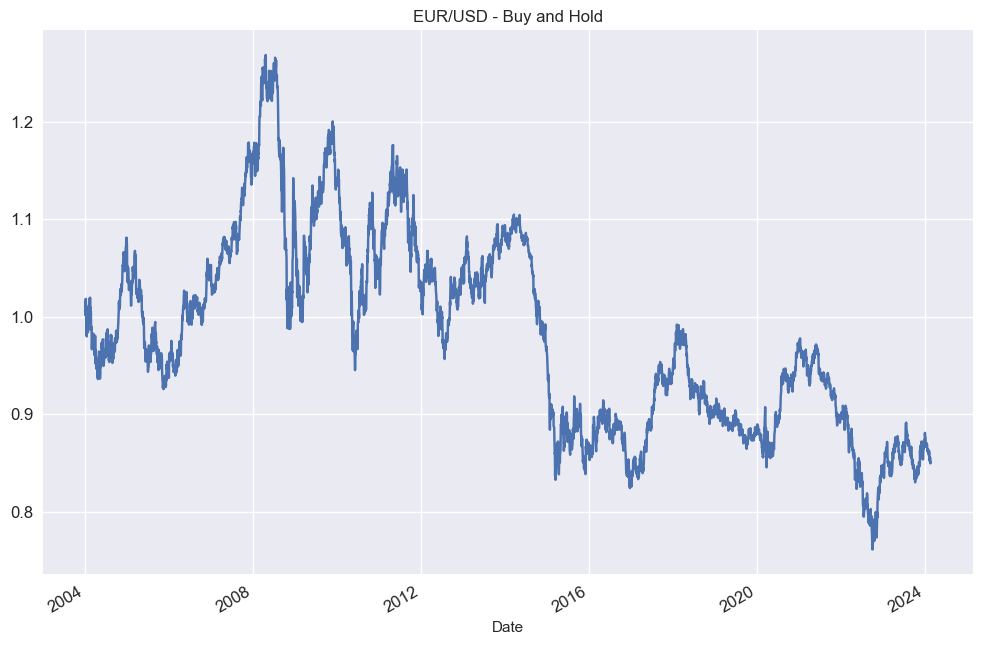

In [164]:
df.creturns.plot(figsize=(12,8),title = "EUR/USD - Buy and Hold", fontsize = 12)
plt.show()

#### more performance

In [165]:
df.creturns.iloc[-1]

0.850904187817259

In [166]:
df.returns.sum()

-0.16145574450604327

In [167]:
df.describe

<bound method NDFrame.describe of                Open   returns  creturns
Date                                   
2004-01-06  1.26730  0.005142  1.005155
2004-01-07  1.27260  0.004173  1.009359
2004-01-08  1.26290 -0.007651  1.001666
2004-01-09  1.27710  0.011181  1.012928
2004-01-12  1.28400  0.005388  1.018401
...             ...       ...       ...
2024-02-09  1.07772  0.000483  0.854791
2024-02-12  1.07853  0.000751  0.855433
2024-02-13  1.07725 -0.001188  0.854418
2024-02-14  1.07107 -0.005753  0.849516
2024-02-15  1.07282  0.001633  0.850904

[5216 rows x 3 columns]>

## annualized mean return and risk

In [171]:
df.returns.mean() * 252 # mean return  年化收益率

-0.00780039256432571

In [173]:
df.returns.std() * np.sqrt(252) # risk

0.09307034612205055

### maximum drawdown

In [174]:
df

,Open,returns,creturns
Date,,,
2004-01-06,1.26730,0.005142,1.005155
2004-01-07,1.27260,0.004173,1.009359
2004-01-08,1.26290,-0.007651,1.001666
2004-01-09,1.27710,0.011181,1.012928
2004-01-12,1.28400,0.005388,1.018401
...,...,...,...
2024-02-09,1.07772,0.000483,0.854791
2024-02-12,1.07853,0.000751,0.855433
2024-02-13,1.07725,-0.001188,0.854418


In [178]:
df["cummax"] = df.creturns.cummax()

In [179]:
df

,Open,returns,creturns,cummax
Date,,,,
2004-01-06,1.26730,0.005142,1.005155,1.005155
2004-01-07,1.27260,0.004173,1.009359,1.009359
2004-01-08,1.26290,-0.007651,1.001666,1.009359
2004-01-09,1.27710,0.011181,1.012928,1.012928
2004-01-12,1.28400,0.005388,1.018401,1.018401
...,...,...,...,...
2024-02-09,1.07772,0.000483,0.854791,1.268718
2024-02-12,1.07853,0.000751,0.855433,1.268718
2024-02-13,1.07725,-0.001188,0.854418,1.268718


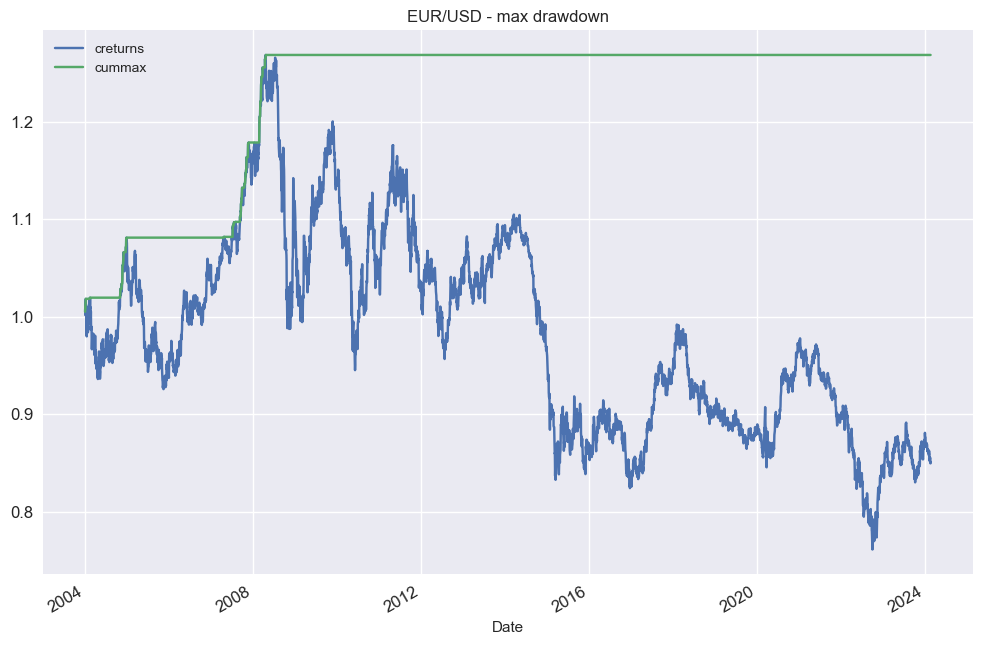

In [181]:
df[["creturns","cummax"]].dropna().plot(figsize = (12,8), title = "EUR/USD - max drawdown", fontsize = 12)
plt.show()

In [188]:
drawdown = df["cummax"] - df["creturns"]
drawdown

Date
2004-01-06    0.000000
2004-01-07    0.000000
2004-01-08    0.007694
2004-01-09    0.000000
2004-01-12    0.000000
                ...   
2024-02-09    0.413928
2024-02-12    0.413285
2024-02-13    0.414300
2024-02-14    0.419202
2024-02-15    0.417814
Length: 5216, dtype: float64

In [189]:
drawdown.max()

0.5076142131979704

In [190]:
drawdown.idxmax()

Timestamp('2022-09-28 00:00:00')